In [1]:
import os
import pandas as pd
import math

def magnitude(X, Y, Z):
    return math.sqrt(float(X**2) + float(Y**2) + float(Z**2))


path = 'gestures-dataset'

dataset = None

for subject in os.listdir(path):
    if os.path.isfile(os.path.join(path, subject)):
        continue
    if subject in ('U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'):
        for gesture in os.listdir(os.path.join(path, subject)):
            if os.path.isfile(os.path.join(path, subject, gesture)):
                continue
            gesture = str(gesture)
            for samplefile in os.listdir(os.path.join(path, subject, gesture)):
                if os.path.isfile(os.path.join(path, subject, gesture, samplefile)):
                    df = pd.read_csv(os.path.join(path, subject, gesture, samplefile), \
                        sep = ' ', \
                        names = ['System.currentTimeMillis()', \
                        'System.nanoTime()', \
                        'sample.timestamp', \
                        'X', \
                        'Y', \
                        'Z' \
                        ])
                    df = df[["sample.timestamp", "X", "Y", "Z"]]
                                        
                    start = df["sample.timestamp"][0]
                    df["sample.timestamp"] -= start
                    df["sample.timestamp"] /= 10000000
                    df["subject"] = subject
                    df["gesture"] = gesture
                    df["sample"] = str(samplefile[:-4])
                    #print(df)
                    if dataset is None:
                        dataset = df.copy()
                    else:
                        dataset = pd.concat([dataset, df])

dataset = dataset.sort_values(by=['gesture','subject','sample','sample.timestamp'])
#print(dataset)
print(dataset.head(10))
print(dataset.tail(10))

                    
            
            

   sample.timestamp         X         Y          Z subject gesture sample
0               0.0  1.532289 -0.919373  10.113108     U01      01     01
1              11.0  0.919373 -0.919373   9.959879     U01      01     01
2              22.0  1.838747 -0.153229  10.726024     U01      01     01
3              33.0  5.822699  3.371036  10.879252     U01      01     01
4              44.0  6.435614  1.532289   9.193734     U01      01     01
5              55.0  2.758120 -7.967903   9.193734     U01      01     01
6              66.0  0.612916 -6.588843   8.887277     U01      01     01
7              77.0  0.000000 -2.145205   9.653421     U01      01     01
8              88.0 -0.153229 -1.685518   9.653421     U01      01     01
9              99.0  0.306458 -0.306458   9.959879     U01      01     01
    sample.timestamp         X         Y         Z subject gesture sample
10             110.0 -1.991976 -8.887277  7.201759     U08      20     20
11             121.0 -0.459687 -2.9113

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

gdf = dataset.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['mean', 'std', 'min', 'max']})
gdf

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_scaled = None

for i, gesture in enumerate(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']):
    for j, subject in enumerate(['U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08']):
        for k, sample in enumerate(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']):
                    
            df = dataset[dataset['gesture']==gesture]
            df = df[df['subject']==subject]
            df = df[df['sample']==sample]
            df.sort_values(by=['sample.timestamp'])

            sc = scaler
            sc = sc.fit_transform(df[["X", "Y", "Z"]])
            sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
            df["X"] = sc["X"]
            df["Y"] = sc["Y"]
            df["Z"] = sc["Z"]
            #df["magnitude"] = sc.apply(lambda row: magnitude(row['X'], row['Y'], row['Z']), axis=1)
            if dataset_scaled is None:
                dataset_scaled = df.copy()
            else:
                dataset_scaled = pd.concat([dataset_scaled, df])
                
#print(dataset_scaled)
print(dataset_scaled.head(10))
print(dataset_scaled.tail(10))



   sample.timestamp         X         Y         Z subject gesture sample
0               0.0  0.046662  0.178172  0.383203     U01      01     01
1              11.0 -0.243681  0.178172  0.139347     U01      01     01
2              22.0  0.191834  0.455329  1.358630     U01      01     01
3              33.0  2.079060  1.730249  1.602485     U01      01     01
4              44.0  2.369403  1.065073 -1.079937     U01      01     01
5              55.0  0.627347 -2.371668 -1.079937     U01      01     01
6              66.0 -0.388851 -1.872786 -1.567648     U01      01     01
7              77.0 -0.679194 -0.265279 -0.348367     U01      01     01
8              88.0 -0.751780 -0.098985 -0.348367     U01      01     01
9              99.0 -0.534023  0.399897  0.139347     U01      01     01
    sample.timestamp         X         Y         Z subject gesture sample
10             110.0 -0.487195 -1.474219 -1.639716     U08      20     20
11             121.0 -0.109525 -0.296052  0.43587

In [ ]:
import numpy as np

for i, gesture in enumerate(dataset_scaled['gesture'].unique()):
    df_gesture = dataset_scaled[dataset_scaled['gesture']==gesture]
    f, axes = plt.subplots(8, 3, figsize=(50,150), sharex="row", sharey="row")
    for j, subject in enumerate(df_gesture['subject'].unique()):
        df_subject = df_gesture[df_gesture['subject']==subject]
                
        time_max = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['max']})
        #print(time_max)
        time_max = time_max['sample.timestamp'].iloc[0]['max']

        
        time_scale = []
        for tmp in range(0, time_max * 11, 11):
            time_scale.append(tmp)
        #print(time_scale)
        dictionary = {'time' : pd.Series(time_scale)}
        for i, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['X']
            #print(dictionary[str(sample)].size)
            if dictionary[str(sample)].count() < time_max:
                tmp = []
                for i in range((dictionary[str(sample)].count() - 1) * 11, time_max - 1 * 11, 11):
                    tmp.append(0.0)
                tmp = pd.Series(tmp,dtype=np.float64)
                dictionary[str(sample)] = dictionary[str(sample)].append(tmp, ignore_index=True)
            #print(dictionary[str(sample)].size)
        #print(dictionary)
        data_preproc = pd.DataFrame(dictionary)
        sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data_preproc, ['time']),ax=axes[j,0])
        dictionary = {'time' : pd.Series(time_scale)}
        for i, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['Y']
            #print(dictionary[str(sample)].size)
            if dictionary[str(sample)].count() < time_max:
                tmp = []
                for i in range((dictionary[str(sample)].count() - 1) * 11, time_max - 1 * 11, 11):
                    tmp.append(0.0)
                tmp = pd.Series(tmp,dtype=np.float64)
                dictionary[str(sample)] = dictionary[str(sample)].append(tmp, ignore_index=True)
            #print(dictionary[str(sample)].size)
        #print(dictionary)
        data_preproc = pd.DataFrame(dictionary)
        sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data_preproc, ['time']),ax=axes[j,1])
        dictionary = {'time' : pd.Series(time_scale)}
        for i, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['Z']
            #print(dictionary[str(sample)].size)
            if dictionary[str(sample)].count() < time_max:
                tmp = []
                for i in range((dictionary[str(sample)].count() - 1) * 11, time_max - 1 * 11, 11):
                    tmp.append(0.0)
                tmp = pd.Series(tmp,dtype=np.float64)
                dictionary[str(sample)] = dictionary[str(sample)].append(tmp, ignore_index=True)
            #print(dictionary[str(sample)].size)
        #print(dictionary)
        data_preproc = pd.DataFrame(dictionary)
        sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data_preproc, ['time']),ax=axes[j,2])
        #plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)        
    plt.show()

        

In [3]:
import numpy as np

dataset_cleaned = None

for i, gesture in enumerate(dataset_scaled['gesture'].unique()):
    df_gesture = dataset_scaled[dataset_scaled['gesture']==gesture]
    for j, subject in enumerate(df_gesture['subject'].unique()):
        df_subject = df_gesture[df_gesture['subject']==subject]
        
        time_mean = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['mean']})
        time_std = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['std']})
        time_max = time_mean['sample.timestamp'].iloc[0]['mean'] + 1.0 * time_std['sample.timestamp'].iloc[0]['std']
        #print(time_max)
        time_min = time_mean['sample.timestamp'].iloc[0]['mean'] - 1.0 * time_std['sample.timestamp'].iloc[0]['std']
        #print(time_min)
        for i, sample in enumerate(df_subject['sample'].unique()):
            df_sample_count = df_subject[df_subject['sample']==sample].count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count < time_min or df_sample_count > time_max:
                df_subject = df_subject[df_subject['sample'] != sample]
                
        if dataset_cleaned is None:
            dataset_cleaned = df_subject.copy()
        else:
            dataset_cleaned = pd.concat([dataset_cleaned, df_subject])

print(dataset_cleaned.head(10))
print(dataset_cleaned.tail(10))


   sample.timestamp         X         Y         Z subject gesture sample
0               0.0  0.046662  0.178172  0.383203     U01      01     01
1              11.0 -0.243681  0.178172  0.139347     U01      01     01
2              22.0  0.191834  0.455329  1.358630     U01      01     01
3              33.0  2.079060  1.730249  1.602485     U01      01     01
4              44.0  2.369403  1.065073 -1.079937     U01      01     01
5              55.0  0.627347 -2.371668 -1.079937     U01      01     01
6              66.0 -0.388851 -1.872786 -1.567648     U01      01     01
7              77.0 -0.679194 -0.265279 -0.348367     U01      01     01
8              88.0 -0.751780 -0.098985 -0.348367     U01      01     01
9              99.0 -0.534023  0.399897  0.139347     U01      01     01
    sample.timestamp         X         Y         Z subject gesture sample
10             110.0 -0.487195 -1.474219 -1.639716     U08      20     20
11             121.0 -0.109525 -0.296052  0.43587

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

gdf = dataset_cleaned.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['mean', 'std', 'min', 'max']})
gdf

In [ ]:
import numpy as np

for i, gesture in enumerate(dataset_cleaned['gesture'].unique()):
    df_gesture = dataset_cleaned[dataset_cleaned['gesture']==gesture]
    f, axes = plt.subplots(8, 3, figsize=(50,150), sharex="all", sharey="all")
    for j, subject in enumerate(df_gesture['subject'].unique()):
        df_subject = df_gesture[df_gesture['subject']==subject]
        
        time_max = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['max']})
        #print(time_max)
        time_max = time_max['sample.timestamp'].iloc[0]['max']
        
        time_scale = []
        for tmp in range(0, time_max * 11, 11):
            time_scale.append(tmp)
        #print(time_scale)
        dictionary = {'time' : pd.Series(time_scale)}
        for i, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['X']
            #print(dictionary[str(sample)].size)
            if dictionary[str(sample)].size < time_max:
                tmp = []
                for i in range((dictionary[str(sample)].size - 1) * 11, time_max - 1 * 11, 11):
                    tmp.append(0.0)
                tmp = pd.Series(tmp,dtype=np.float64)
                dictionary[str(sample)] = dictionary[str(sample)].append(tmp, ignore_index=True)
            #print(dictionary[str(sample)].size)
        #print(dictionary)
        data_preproc = pd.DataFrame(dictionary)
        sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data_preproc, ['time']),ax=axes[j,0])
        dictionary = {'time' : pd.Series(time_scale)}
        for i, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['Y']
            #print(dictionary[str(sample)].size)
            if dictionary[str(sample)].size < time_max:
                tmp = []
                for i in range((dictionary[str(sample)].size - 1) * 11, time_max - 1 * 11, 11):
                    tmp.append(0.0)
                tmp = pd.Series(tmp,dtype=np.float64)
                dictionary[str(sample)] = dictionary[str(sample)].append(tmp, ignore_index=True)
            #print(dictionary[str(sample)].size)
        #print(dictionary)
        data_preproc = pd.DataFrame(dictionary)
        sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data_preproc, ['time']),ax=axes[j,1])
        dictionary = {'time' : pd.Series(time_scale)}
        for i, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['Z']
            #print(dictionary[str(sample)].size)
            if dictionary[str(sample)].size < time_max:
                tmp = []
                for i in range((dictionary[str(sample)].size - 1) * 11, time_max - 1 * 11, 11):
                    tmp.append(0.0)
                tmp = pd.Series(tmp,dtype=np.float64)
                dictionary[str(sample)] = dictionary[str(sample)].append(tmp, ignore_index=True)
            #print(dictionary[str(sample)].size)
        #print(dictionary)
        data_preproc = pd.DataFrame(dictionary)
        sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data_preproc, ['time']),ax=axes[j,2])
        #plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)        
    plt.show()

        

In [4]:
import numpy as np

dataset_timecut = None

for i, gesture in enumerate(dataset_cleaned['gesture'].unique()):
    df_gesture = dataset_cleaned[dataset_cleaned['gesture']==gesture]
    for j, subject in enumerate(df_gesture['subject'].unique()):
        df_subject = df_gesture[df_gesture['subject']==subject] 
        time_max = 19 # 18 * 11 = 198
        for i, sample in enumerate(df_subject['sample'].unique()):
            df_sample = df_subject[df_subject['sample']==sample]
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count >= time_max:
                df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
            elif df_sample_count < time_max:
                for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                    df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, subject, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'subject', 'sample'])
                    df_sample = df_sample.append(df, ignore_index=True)            
            #print(df_sample)
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count != time_max:
                continue
            if dataset_timecut is None:
                dataset_timecut = df_sample.copy()
            else:
                dataset_timecut = pd.concat([dataset_timecut, df_sample])

print(dataset_timecut.head(10))
print(dataset_timecut.tail(10))

   sample.timestamp         X         Y         Z subject gesture sample
0               0.0  0.046662  0.178172  0.383203     U01      01     01
1              11.0 -0.243681  0.178172  0.139347     U01      01     01
2              22.0  0.191834  0.455329  1.358630     U01      01     01
3              33.0  2.079060  1.730249  1.602485     U01      01     01
4              44.0  2.369403  1.065073 -1.079937     U01      01     01
5              55.0  0.627347 -2.371668 -1.079937     U01      01     01
6              66.0 -0.388851 -1.872786 -1.567648     U01      01     01
7              77.0 -0.679194 -0.265279 -0.348367     U01      01     01
8              88.0 -0.751780 -0.098985 -0.348367     U01      01     01
9              99.0 -0.534023  0.399897  0.139347     U01      01     01
    sample.timestamp         X         Y         Z subject gesture sample
9               99.0 -0.487195 -1.927360  0.435874     U08      20     20
10             110.0 -0.487195 -1.474219 -1.63971

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

gdf = dataset_timecut.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['mean', 'std', 'min', 'max']})
gdf

        

In [ ]:
import numpy as np

for i, gesture in enumerate(dataset_timecut['gesture'].unique()):
    df_gesture = dataset_timecut[dataset_timecut['gesture']==gesture]
    f, axes = plt.subplots(8, 3, figsize=(50,150), sharex="all", sharey="all")
    for j, subject in enumerate(df_gesture['subject'].unique()):
        df_subject = df_gesture[df_gesture['subject']==subject]
                        
        time_max = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['max']})
        #print(time_max)
        time_max = time_max['sample.timestamp'].iloc[0]['max']

        time_scale = []
        for tmp in range(0, time_max * 11, 11):
            time_scale.append(tmp)

        dictionary = {'time' : pd.Series(time_scale)}
        for k, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['X']
        data_preproc = pd.DataFrame(dictionary)
        data=pd.melt(data_preproc, ['time'])
        sns.lineplot(x='time', y='value', hue='variable', data=data, ax=axes[j,0])

        dictionary = {'time' : pd.Series(time_scale)}
        for k, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['Y']
        data_preproc = pd.DataFrame(dictionary)
        data=pd.melt(data_preproc, ['time'])
        sns.lineplot(x='time', y='value', hue='variable', data=data, ax=axes[j,1])

        dictionary = {'time' : pd.Series(time_scale)}
        for k, sample in enumerate(df_subject['sample'].unique()):
            dictionary[str(sample)] = df_subject[df_subject['sample']==sample]['Z']
        data_preproc = pd.DataFrame(dictionary)
        data=pd.melt(data_preproc, ['time'])
        sns.lineplot(x='time', y='value', hue='variable', data=data, ax=axes[j,2])

    plt.show()

        

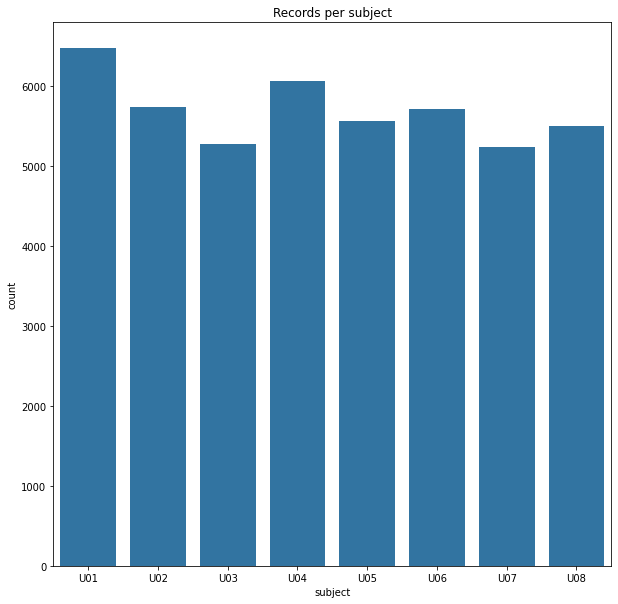

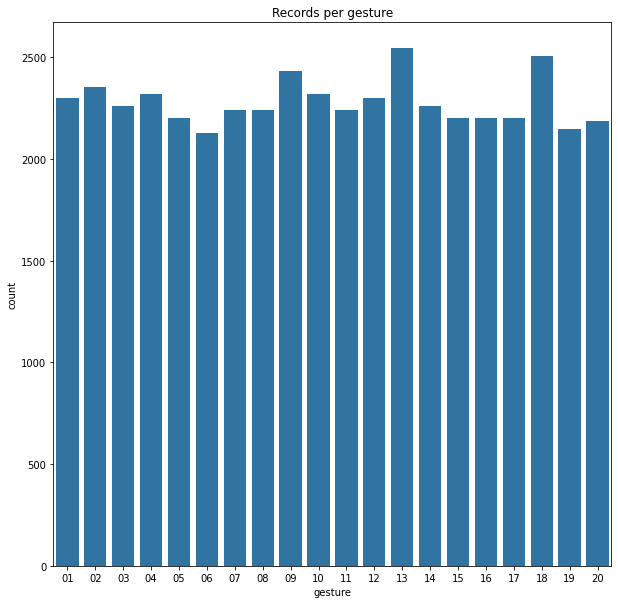

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.countplot(x = 'subject',
              data = dataset_timecut,
              palette=[sns.color_palette()[0]]
              );
plt.title("Records per subject");
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x = 'gesture',
              data = dataset_timecut,
              palette=[sns.color_palette()[0]]
              );
plt.title("Records per gesture");
plt.show()

In [6]:
import numpy as np
import math

features_sample = None

for i, gesture in enumerate(dataset_timecut['gesture'].unique()):
    df_gesture = dataset_timecut[dataset_timecut['gesture']==gesture]
    for j, subject in enumerate(df_gesture['subject'].unique()):
        df_subject = df_gesture[df_gesture['subject']==subject]
        for k, sample in enumerate(df_subject['sample'].unique()):
            df_sample = df_subject[df_subject['sample']==sample]
            df_sample.sort_values(by=['sample.timestamp'])

            df_feature = pd.DataFrame(columns = ["gesture","subject", "sample"])
            df_feature = df_feature.append({'gesture' :gesture, 'subject' : subject, 'sample' : sample, \
                                        'meanx': df_sample["X"].mean(), 'meany': df_sample["Y"].mean(), 'meanz': df_sample["Z"].mean(), \
                                        'stdx': df_sample["X"].std(), 'stdy': df_sample["Y"].std(), 'stdz': df_sample["Z"].std(), \
                                        'madx': df_sample["X"].mad(), 'mady': df_sample["Y"].mad(), 'madz': df_sample["Z"].mad(), \
                                        'semx': df_sample["X"].sem(), 'semy': df_sample["Y"].sem(), 'semz': df_sample["Z"].sem(), \
                                        'kurtx': df_sample["X"].kurt(), 'kurty': df_sample["Y"].kurt(), 'kurtz': df_sample["Z"].kurt(), \
                                        'skewx': df_sample["X"].skew(), 'skewy': df_sample["Y"].skew(), 'skewz': df_sample["Z"].skew(), \
                                        'corr9x': df_sample["X"].autocorr(9), 'corr9y': df_sample["Y"].autocorr(9), 'corr9z': df_sample["Z"].autocorr(9), \
                                        'corr6x': df_sample["X"].autocorr(6), 'corr6y': df_sample["Y"].autocorr(6), 'corr6z': df_sample["Z"].autocorr(6), \
                                        'corr3x': df_sample["X"].autocorr(3), 'corr3y': df_sample["Y"].autocorr(3), 'corr3z': df_sample["Z"].autocorr(3), \
                                        'corr2x': df_sample["X"].autocorr(2), 'corr2y': df_sample["Y"].autocorr(2), 'corr2z': df_sample["Z"].autocorr(2), \
                                       }, \
                                       ignore_index=True)
            if features_sample is None:
                features_sample = df_feature.copy()
            else:
                features_sample = pd.concat([features_sample, df_feature], ignore_index=True)

print(features_sample.head(10))
print(features_sample.tail(10))


  gesture subject sample    corr2x    corr3x    corr6x    corr9x    corr9y  \
0      01     U01     01  0.160966 -0.079454 -0.480912 -0.643806 -0.324033   
1      01     U01     02  0.315309  0.012690 -0.132506 -0.596610 -0.084808   
2      01     U01     03  0.218859 -0.130593 -0.504833 -0.462442 -0.010936   
3      01     U01     04  0.388717  0.070343 -0.527360 -0.797602  0.028793   
4      01     U01     05  0.394696  0.135435 -0.191448 -0.709376  0.139838   
5      01     U01     06  0.288933 -0.111583 -0.543804 -0.531821 -0.044989   
6      01     U01     08  0.294426  0.037376 -0.207872 -0.592945 -0.025232   
7      01     U01     09  0.329980  0.010261 -0.577985 -0.561376 -0.199393   
8      01     U01     10  0.445986  0.197228 -0.382248 -0.533073  0.143473   
9      01     U01     11  0.287218 -0.083508 -0.701710 -0.408478 -0.283030   

     corr9z     kurtx  ...         meanz      semx      semy      semz  \
0  0.068059  3.153300  ...  1.402387e-16  0.202326  0.202326  0.202

In [ ]:
import sys
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
import sklearn 
#print(sklearn.__version__)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedGroupKFold

# create the dataset
def get_dataset():
    X = features_sample.copy().drop(labels = ["gesture","subject", "sample"], axis = 1).to_numpy()
    y = features_sample.copy()["gesture"].to_list()
    g = features_sample.copy()["subject"].to_list()
    return X, y, g
 
# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression(penalty="l2",max_iter=100000,solver="sag"))
	models.append(RidgeClassifier(max_iter=100000, solver="sag"))
	models.append(SGDClassifier(max_iter=100000))
	models.append(PassiveAggressiveClassifier(max_iter=100000))
	models.append(KNeighborsClassifier(n_neighbors=5))
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC(max_iter=100000))
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier(max_iter_predict=10000))
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y, g = get_dataset()
    cv = cv.split(X, y, g)
    # evaluate the model
    scores = cross_val_score(model, X, y, groups=g, scoring='accuracy', cv=cv, n_jobs=60, verbose=0)
    # return scores
    return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
# define folds to test
cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=1000)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
	# store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
	# summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
    sys.stdout.flush()
    
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('5-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

work = features_sample.copy()
targets = pd.DataFrame(work[["gesture","subject","sample"]], columns=["gesture","subject","sample"])
targets.reset_index(inplace=True, drop=True)
target_for_plot = pd.DataFrame(work[["gesture"]], columns=["gesture"])
target_for_plot.reset_index(inplace=True, drop=True)
work = work.drop(labels = ["gesture","subject", "sample"], axis = 1)

#pca = PCA(n_components=3)
pca = PCA(.99)
principalComponents = pca.fit_transform(work)
#print(principalComponents[0])
#print(pca.explained_variance_ratio_)
#total = 0
#for tmp in pca.explained_variance_ratio_:
#    total += tmp
#print(total)
print(pca.n_features_)
print(pca.n_samples_)
#print(pca.noise_variance_)
print(pca.n_components_)
#print(pca.components_)

columns = []
for i in range(pca.n_components_):
    columns.append("principal component "+str(i+1))
features_pca = pd.DataFrame(data = principalComponents, columns = columns)
features_pca = pd.concat([features_pca, targets], axis = 1)
features_pca_for_plot = pd.DataFrame(data = principalComponents, columns = columns)
features_pca_for_plot = pd.concat([features_pca_for_plot, target_for_plot], axis = 1)

fig = plt.figure(figsize = (70,70))
import seaborn as sns
sns.pairplot(features_pca_for_plot, hue='gesture')
plt.show()


In [ ]:
import sys
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
import sklearn 
#print(sklearn.__version__)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedGroupKFold

# create the dataset
def get_dataset():
    X = features_pca.copy().drop(labels = ["gesture","subject", "sample"], axis = 1).to_numpy()
    y = features_pca.copy()["gesture"].to_list()
    g = features_pca.copy()["subject"].to_list()
    return X, y, g
 
# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression(penalty="l2",max_iter=100000,solver="sag"))
	models.append(RidgeClassifier(max_iter=100000, solver="sag"))
	models.append(SGDClassifier(max_iter=100000))
	models.append(PassiveAggressiveClassifier(max_iter=100000))
	models.append(KNeighborsClassifier(n_neighbors=5))
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC(max_iter=100000))
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier(max_iter_predict=10000))
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y, g = get_dataset()
    cv = cv.split(X, y, g)
    # evaluate the model
    scores = cross_val_score(model, X, y, groups=g, scoring='accuracy', cv=cv, n_jobs=60, verbose=0)
    # return scores
    return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
# define folds to test
cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=1000)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
	# store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
	# summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
    sys.stdout.flush()
    
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('5-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
 
# fix random seed for reproducibility
seed = 1000
numpy.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model(epochs=10, dropout_rate=0.2):
	...
	return model

model = KerasClassifier(build_fn=create_model)
 
# create the dataset
def get_dataset():
    X = dataset_timecut.copy().drop(labels = ["gesture","subject", "event"], axis = 1).to_numpy()
    y = dataset_timecut.copy()["gesture"].to_list()
	g = dataset_timecut.copy()["subject"].to_list()
    return X, y, g

X, y, g = get_dataset()

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
cat_Y = np_utils.to_categorical(encoded_Y)
# create model
#model = KerasClassifier(build_fn=create_model, verbose=1)
# create model
model = KerasClassifier(build_fn=create_model, epochs=1500, batch_size=12, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
